In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint
import random
import json
import scipy.stats as st
# Import API key
from api_keys import weather_api_key



# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

In [3]:
list(cities)

['punta arenas',
 'chuy',
 'lahad datu',
 'montijo',
 'rikitea',
 'kruisfontein',
 'albany',
 'obera',
 'ushuaia',
 'port elizabeth',
 'torring',
 'atuona',
 'busselton',
 'hofn',
 'providencia',
 'labuhan',
 'port alfred',
 'marienburg',
 'souillac',
 'puerto ayora',
 'nouadhibou',
 'taolanaro',
 'portland',
 'jiroft',
 'boden',
 'mataura',
 'kearney',
 'jalu',
 'hobart',
 'muros',
 'iqaluit',
 'amuntai',
 'kununurra',
 'buraydah',
 'fairbanks',
 'dikson',
 'felidhoo',
 'new norfolk',
 'lata',
 'zhigansk',
 'bekhtery',
 'jamestown',
 'ixtapa',
 'esperance',
 'saint-philippe',
 'eureka',
 'cape town',
 'san patricio',
 'nizhneyansk',
 'jiujiang',
 'tilichiki',
 'illoqqortoormiut',
 'chokurdakh',
 'georgetown',
 'lazaro cardenas',
 'mato verde',
 'qaanaaq',
 'hermanus',
 'ondorhaan',
 'yekimovichi',
 'jiddah',
 'lagoa',
 'mergui',
 'mar del plata',
 'ahipara',
 'kirakira',
 'bethel',
 'albanel',
 'axim',
 'doha',
 'narsaq',
 'altay',
 'louisbourg',
 'corlu',
 'la grande',
 'butaritari',

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "metric"
lat = []
lng = []
City_Name = []


for city in cities:
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url + city).json()
    print(f"Retrieving results for {city}:")
    try:
        lat.append(response["coord"]['lat'])
        lng.append(response["coord"]['lon'])
        City_Name.append(response["name"])
        print(f"Successfully appending results for {city}:")
    except:
        print("Missing field/result... skipping.")
        pass

one_dict = {
    "City": City_Name,
    "Lat": lat,
    "Lng": lng
}
one_data = pd.DataFrame(one_dict)

Retrieving results for punta arenas:
Successfully appending results for punta arenas:
Retrieving results for chuy:
Successfully appending results for chuy:
Retrieving results for lahad datu:
Successfully appending results for lahad datu:
Retrieving results for montijo:
Successfully appending results for montijo:
Retrieving results for rikitea:
Successfully appending results for rikitea:
Retrieving results for kruisfontein:
Successfully appending results for kruisfontein:
Retrieving results for albany:
Successfully appending results for albany:
Retrieving results for obera:
Successfully appending results for obera:
Retrieving results for ushuaia:
Successfully appending results for ushuaia:
Retrieving results for port elizabeth:
Successfully appending results for port elizabeth:
Retrieving results for torring:
Successfully appending results for torring:
Retrieving results for atuona:
Successfully appending results for atuona:
Retrieving results for busselton:
Successfully appending resul

Retrieving results for rapid valley:
Successfully appending results for rapid valley:
Retrieving results for vestmannaeyjar:
Successfully appending results for vestmannaeyjar:
Retrieving results for ulaangom:
Successfully appending results for ulaangom:
Retrieving results for pullman:
Successfully appending results for pullman:
Retrieving results for belyy yar:
Successfully appending results for belyy yar:
Retrieving results for znamenskoye:
Successfully appending results for znamenskoye:
Retrieving results for jalingo:
Successfully appending results for jalingo:
Retrieving results for provideniya:
Successfully appending results for provideniya:
Retrieving results for solnechnyy:
Successfully appending results for solnechnyy:
Retrieving results for kahului:
Successfully appending results for kahului:
Retrieving results for upernavik:
Successfully appending results for upernavik:
Retrieving results for san francisco del mar:
Successfully appending results for san francisco del mar:
Retr

Retrieving results for namibe:
Successfully appending results for namibe:
Retrieving results for male:
Successfully appending results for male:
Retrieving results for christchurch:
Successfully appending results for christchurch:
Retrieving results for jasper:
Successfully appending results for jasper:
Retrieving results for codrington:
Successfully appending results for codrington:
Retrieving results for longford:
Successfully appending results for longford:
Retrieving results for qaqortoq:
Successfully appending results for qaqortoq:
Retrieving results for tongchuan:
Successfully appending results for tongchuan:
Retrieving results for te anau:
Successfully appending results for te anau:
Retrieving results for le mars:
Successfully appending results for le mars:
Retrieving results for faanui:
Successfully appending results for faanui:
Retrieving results for egvekinot:
Successfully appending results for egvekinot:
Retrieving results for zhangjiakou:
Successfully appending results for z

Retrieving results for xining:
Successfully appending results for xining:
Retrieving results for gweta:
Successfully appending results for gweta:
Retrieving results for haibowan:
Missing field/result... skipping.
Retrieving results for piacabucu:
Successfully appending results for piacabucu:
Retrieving results for cairns:
Successfully appending results for cairns:
Retrieving results for krasnoselkup:
Successfully appending results for krasnoselkup:
Retrieving results for arlit:
Successfully appending results for arlit:
Retrieving results for pinega:
Successfully appending results for pinega:
Retrieving results for bonavista:
Successfully appending results for bonavista:
Retrieving results for bardiyah:
Successfully appending results for bardiyah:
Retrieving results for santa rosa:
Successfully appending results for santa rosa:
Retrieving results for azimur:
Missing field/result... skipping.
Retrieving results for geraldton:
Successfully appending results for geraldton:
Retrieving resul

Retrieving results for kazalinsk:
Missing field/result... skipping.
Retrieving results for shellbrook:
Successfully appending results for shellbrook:
Retrieving results for padang:
Successfully appending results for padang:
Retrieving results for ternate:
Successfully appending results for ternate:
Retrieving results for neuquen:
Successfully appending results for neuquen:
Retrieving results for kupang:
Successfully appending results for kupang:
Retrieving results for palanga:
Successfully appending results for palanga:
Retrieving results for alihe:
Successfully appending results for alihe:
Retrieving results for dum duma:
Successfully appending results for dum duma:
Retrieving results for valkeala:
Successfully appending results for valkeala:
Retrieving results for bentiu:
Successfully appending results for bentiu:
Retrieving results for marovoay:
Successfully appending results for marovoay:
Retrieving results for durazno:
Successfully appending results for durazno:
Retrieving results

Retrieving results for kahramanmaras:
Successfully appending results for kahramanmaras:
Retrieving results for gulshat:
Missing field/result... skipping.
Retrieving results for iquitos:
Successfully appending results for iquitos:
Retrieving results for puerto madryn:
Successfully appending results for puerto madryn:
Retrieving results for naples:
Successfully appending results for naples:
Retrieving results for ouadda:
Successfully appending results for ouadda:
Retrieving results for el alto:
Successfully appending results for el alto:
Retrieving results for wajir:
Successfully appending results for wajir:
Retrieving results for san jeronimo:
Successfully appending results for san jeronimo:
Retrieving results for goya:
Successfully appending results for goya:
Retrieving results for artyom:
Successfully appending results for artyom:
Retrieving results for redlands:
Successfully appending results for redlands:
Retrieving results for yarmouth:
Successfully appending results for yarmouth:


In [5]:
one_data["Max Temp"] = ""
one_data["Humidity"] = ""
one_data["Cloudiness"] = ""
one_data["Wind speed"] = ""
one_data["Country"] = ""
one_data["Date"] = ""


In [6]:
base_url = "https://api.openweathermap.org/data/2.5/weather?"

for index, row in one_data.iterrows():
    lat = one_data.loc[index, "Lat"]
    lng = one_data.loc[index, "Lng"]
    query_url_2 = f"{base_url}lat={lat}&lon={lng}&appid={weather_api_key}&units={units}&q="
    response = requests.get(query_url_2).json()
    print(f"Retrieving results for {index}:")
    try:
        one_data.loc[index, "Max Temp"] = response['main']['temp_max']
        one_data.loc[index, "Humidity"] = response['main']['humidity']
        one_data.loc[index, "Cloudiness"] = response['clouds']['all']
        one_data.loc[index, "Wind speed"] = response['wind']['speed']
        one_data.loc[index, "Country"] = response['sys']['country']
        one_data.loc[index, "Date"] = response['dt']
        print("Successfully appended results.")
    except:
        print("Missing field/result... skipping.")

Retrieving results for 0:
Successfully appended results.
Retrieving results for 1:
Successfully appended results.
Retrieving results for 2:
Successfully appended results.
Retrieving results for 3:
Successfully appended results.
Retrieving results for 4:
Successfully appended results.
Retrieving results for 5:
Successfully appended results.
Retrieving results for 6:
Successfully appended results.
Retrieving results for 7:
Successfully appended results.
Retrieving results for 8:
Successfully appended results.
Retrieving results for 9:
Successfully appended results.
Retrieving results for 10:
Successfully appended results.
Retrieving results for 11:
Successfully appended results.
Retrieving results for 12:
Successfully appended results.
Retrieving results for 13:
Successfully appended results.
Retrieving results for 14:
Successfully appended results.
Retrieving results for 15:
Successfully appended results.
Retrieving results for 16:
Successfully appended results.
Retrieving results for 1

Retrieving results for 141:
Successfully appended results.
Retrieving results for 142:
Successfully appended results.
Retrieving results for 143:
Successfully appended results.
Retrieving results for 144:
Successfully appended results.
Retrieving results for 145:
Successfully appended results.
Retrieving results for 146:
Successfully appended results.
Retrieving results for 147:
Successfully appended results.
Retrieving results for 148:
Successfully appended results.
Retrieving results for 149:
Successfully appended results.
Retrieving results for 150:
Successfully appended results.
Retrieving results for 151:
Successfully appended results.
Retrieving results for 152:
Successfully appended results.
Retrieving results for 153:
Successfully appended results.
Retrieving results for 154:
Successfully appended results.
Retrieving results for 155:
Successfully appended results.
Retrieving results for 156:
Successfully appended results.
Retrieving results for 157:
Successfully appended result

Retrieving results for 280:
Successfully appended results.
Retrieving results for 281:
Successfully appended results.
Retrieving results for 282:
Successfully appended results.
Retrieving results for 283:
Successfully appended results.
Retrieving results for 284:
Successfully appended results.
Retrieving results for 285:
Successfully appended results.
Retrieving results for 286:
Successfully appended results.
Retrieving results for 287:
Successfully appended results.
Retrieving results for 288:
Successfully appended results.
Retrieving results for 289:
Successfully appended results.
Retrieving results for 290:
Successfully appended results.
Retrieving results for 291:
Successfully appended results.
Retrieving results for 292:
Successfully appended results.
Retrieving results for 293:
Successfully appended results.
Retrieving results for 294:
Successfully appended results.
Retrieving results for 295:
Successfully appended results.
Retrieving results for 296:
Successfully appended result

Retrieving results for 419:
Successfully appended results.
Retrieving results for 420:
Successfully appended results.
Retrieving results for 421:
Successfully appended results.
Retrieving results for 422:
Successfully appended results.
Retrieving results for 423:
Successfully appended results.
Retrieving results for 424:
Successfully appended results.
Retrieving results for 425:
Successfully appended results.
Retrieving results for 426:
Successfully appended results.
Retrieving results for 427:
Successfully appended results.
Retrieving results for 428:
Successfully appended results.
Retrieving results for 429:
Successfully appended results.
Retrieving results for 430:
Successfully appended results.
Retrieving results for 431:
Successfully appended results.
Retrieving results for 432:
Successfully appended results.
Retrieving results for 433:
Successfully appended results.
Retrieving results for 434:
Successfully appended results.
Retrieving results for 435:
Successfully appended result

In [7]:
one_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,1.06,86,75,3.09,CL,1659940685
1,Chui,-33.6971,-53.4616,8.32,87,5,3.18,UY,1659940899
2,Lahad Datu,5.0268,118.3270,29.7,68,99,3.96,MY,1659940901
3,Montijo,38.7067,-8.9739,19.47,83,0,0,PT,1659940757
4,Rikitea,-23.1203,-134.9692,21.49,82,100,16.56,PF,1659940904


In [8]:
one_data.to_csv('clean_city_data.csv', index=False)

In [1]:
latitude = list(one_data['Lat'])
temperature = list(one_data['Max Temp'])
plt.scatter(latitude, temperature, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature(Celcius)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)
plt.savefig('fig1.png')

NameError: name 'one_data' is not defined

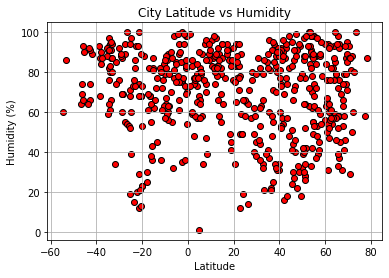

In [10]:
latitude = list(one_data['Lat'])
humidity = list(one_data['Humidity'])
plt.scatter(latitude, humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig('fig2.png')

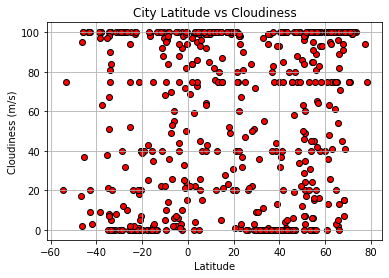

In [11]:
latitude = list(one_data['Lat'])
cloudiness = list(one_data['Cloudiness'])
plt.scatter(latitude, cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (m/s)")
plt.grid(True)
plt.savefig('fig3.png')

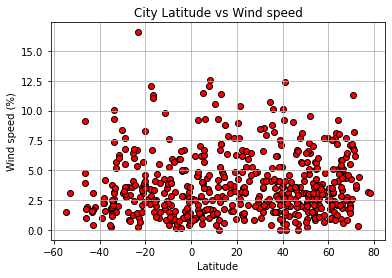

In [12]:
latitude = list(one_data['Lat'])
Windspeed = list(one_data['Wind speed'])
plt.scatter(latitude, Windspeed, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed (%)")
plt.grid(True)
plt.savefig('fig4.png')

In [13]:
n_hem = one_data.loc[one_data['Lat'] >= 0]
s_hem = one_data.loc[one_data['Lat'] < 0]


The r-squared is: 0.3926510741372999


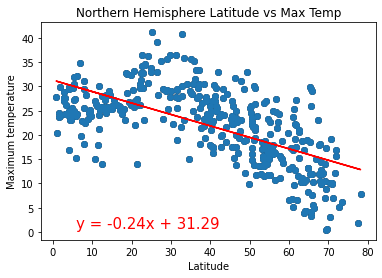

In [14]:
latitude = n_hem['Lat']
maxt = n_hem['Max Temp']
l = latitude.astype(float)
m = maxt.astype(float)
plt.scatter(l, m, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature")


x_values = l
y_values = m
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.6096359911988346


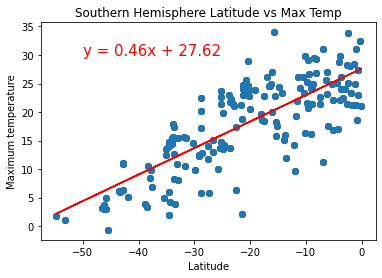

In [15]:
slatitude = s_hem['Lat']
smaxt = s_hem['Max Temp']
sl = slatitude.astype(float)
sm = smaxt.astype(float)
plt.scatter(sl, sm, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Maximum temperature")


x_values = sl
y_values = sm
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0049705778630831


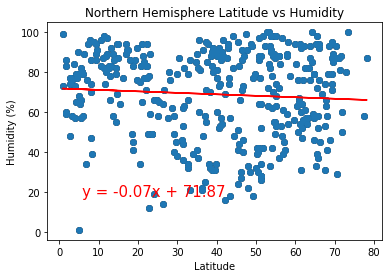

In [16]:
latitude = n_hem['Lat']
humidity = n_hem['Humidity']
l = latitude.astype(float)
h = humidity.astype(float)
plt.scatter(l, h, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


x_values = l
y_values = h
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,18),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.006243121194718305


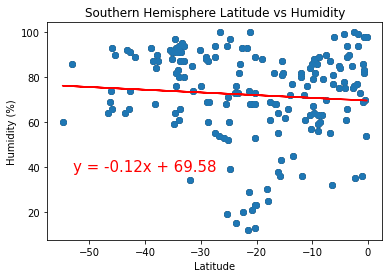

In [17]:
slatitude = s_hem['Lat']
shumidity = s_hem['Humidity']
sl = slatitude.astype(float)
sh = shumidity.astype(float)
plt.scatter(sl, sh, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


x_values = sl
y_values = sh
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-53,38),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 1.4474500395382452e-05


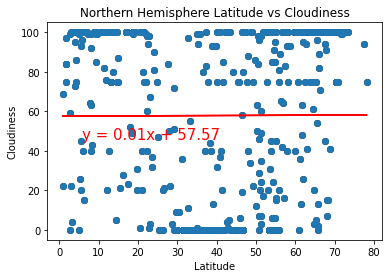

In [18]:
latitude = n_hem['Lat']
Cloudiness = n_hem['Cloudiness']
l = latitude.astype(float)
c = Cloudiness.astype(float)
plt.scatter(l, c, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


x_values = l
y_values = c
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,45.8),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 3.438963103326902e-06


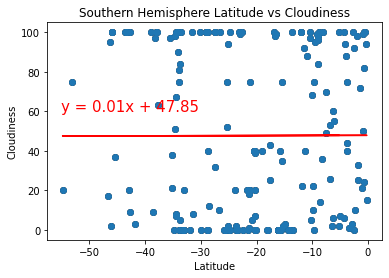

In [19]:
slatitude = s_hem['Lat']
sCloudiness = s_hem['Cloudiness']
sl = slatitude.astype(float)
sc = sCloudiness.astype(float)
plt.scatter(sl, sc, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


x_values = sl
y_values = sc
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.0016211357327063462


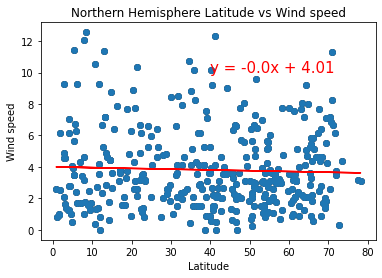

In [20]:
latitude = n_hem['Lat']
windspeed = n_hem['Wind speed']
l = latitude.astype(float)
w = windspeed.astype(float)
plt.scatter(l, w, marker="o", facecolors="red", edgecolors="black")
plt.title("Northern Hemisphere Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")


x_values = l
y_values = w
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")

The r-squared is: 0.01160685490814657


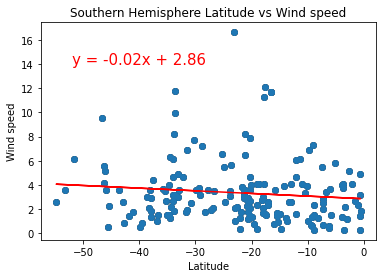

In [44]:

slatitude = s_hem['Lat']
swindspeed = s_hem['Wind speed']
sl = slatitude.astype(float)
sw = swindspeed.astype(float)
plt.scatter(sl, sw, marker="o", facecolors="red", edgecolors="black")
plt.title("Southern Hemisphere Latitude vs Wind speed")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")


x_values = sl
y_values = sw
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-52,14),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")